In [2]:
import pandas as pd
import numpy as np
from gseapy.plot import gseaplot
import gseapy as gp
from gseapy import barplot, dotplot
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
import seaborn as sns
import df_helpers as helper
import os
dirs = helper.dirs()

## Define Gene Sets

In [3]:
# gp.get_library_name()
norm_counts_df = helper.read_normcounts()
res_df = helper.read_results(None, 'D100')
# norm_counts_df
# res_df = res_df[:500]

## Enrichr

In [ ]:
gene_list = norm_counts_df.iloc[:3000].index.to_list()
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=gene_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [ ]:
enr.results.to_excel(f'{dirs.gsea}/enrichr.xlsx')

## Hierarchical Clustering

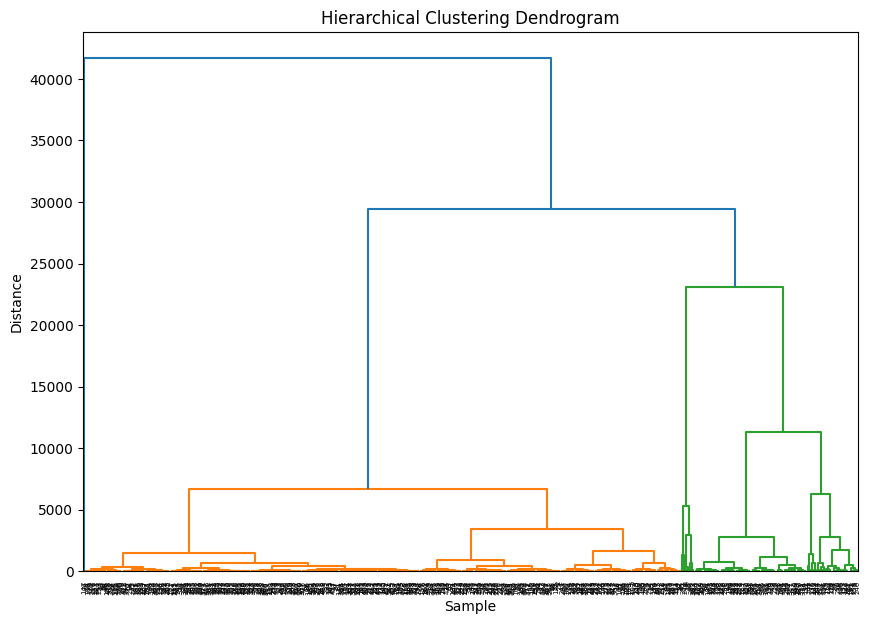

array([[2.60000000e+02, 2.70000000e+02, 4.98232203e-01, 2.00000000e+00],
       [3.67000000e+02, 3.87000000e+02, 5.45581425e-01, 2.00000000e+00],
       [4.09000000e+02, 4.38000000e+02, 7.29143757e-01, 2.00000000e+00],
       ...,
       [9.92000000e+02, 9.95000000e+02, 2.30917402e+04, 1.14000000e+02],
       [9.94000000e+02, 9.96000000e+02, 2.94258138e+04, 4.99000000e+02],
       [1.47000000e+02, 9.97000000e+02, 4.17112298e+04, 5.00000000e+02]])

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

distance_matrix = pdist(res_df, metric='euclidean')
linkage_matrix = linkage(distance_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()
linkage_matrix


In [47]:
from scipy.cluster.hierarchy import fcluster
max_d =5000  # Example distance cutoff
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

gene_cluster_df = pd.DataFrame({'Gene': res_df.index.to_list(), 'Cluster': clusters})
sorted_gene_cluster_df = gene_cluster_df.sort_values(by='Cluster')
clusters = sorted_gene_cluster_df.groupby('Cluster')['Gene'].apply(list).to_dict()
# pd.DataFrame.from_dict(clusters)
# pd.DataFrame(dict([(k, pd.Series(v)) for k, v in clusters.items()]))

for i in range(len(clusters)): print(len(clusters[i+1]))

with pd.ExcelWriter(f'{dirs.gsea}/clustered_normcounts.xlsx', engine='openpyxl') as writer:
    for i in range(len(clusters)):
        res_df[res_df.index.isin(clusters[i+1])].to_excel(writer,sheet_name=f'Cluster {i+1}')

216
169
2
6
73
6
27
1


,index,A0,A1,A2,A3,A7,A10,C0,C1,C2,...,X2,X3,X7,X10,Z0,Z1,Z2,Z3,Z7,Z10
Symbol,,,,,,,,,,,,,,,,,,,,,
0,TSPAN6,494.114985,725.181823,580.818098,565.079268,645.261199,612.532579,379.683160,672.474461,562.093668,...,711.843227,537.182837,517.277888,514.528048,376.027340,697.904922,661.009817,620.404021,537.821312,625.301728
1,TNMD,1.173670,2.280446,3.256924,1.040662,5.186987,5.004351,2.287248,2.334981,3.280702,...,8.032082,5.327433,11.937182,10.608826,7.414624,9.970070,7.932118,6.065402,9.115615,25.747718
2,DPM1,2137.252701,1562.105499,1449.331142,1295.623735,1280.148423,1128.981615,1631.951414,1644.993950,1474.128919,...,1129.511467,931.412886,783.874954,814.227375,1029.573450,988.849701,1040.870125,1125.565396,888.772507,827.605229
3,SCYL3,113.845970,100.339623,110.735413,92.618885,99.590153,98.085282,96.064414,93.399231,129.040959,...,103.413050,105.660756,103.455578,88.406881,90.034715,94.262483,93.422721,72.784829,97.537085,90.117014
4,C1orf112,217.128912,226.904375,186.730304,183.156448,274.910318,267.232350,225.293923,190.300933,182.625764,...,266.062701,195.339213,284.502839,293.510845,166.299415,182.180376,252.946423,246.948528,303.549995,325.524723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48699,Z96074.1,3.521009,13.682676,9.770772,13.528601,8.299179,12.010443,2.287248,3.502471,12.029242,...,8.032082,12.430677,7.958121,9.724757,8.473856,11.782810,9.694811,14.730263,7.292492,3.678245
48702,AL592295.4,9.389358,5.701115,6.513848,4.162647,7.261782,3.002611,12.579864,1.167490,9.842107,...,2.008020,6.215339,2.984296,4.420344,8.473856,5.438220,5.288079,6.931889,4.557808,3.678245
48703,HSFX3,0.000000,0.000000,0.000000,0.000000,1.037397,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.881346,0.000000,0.000000,0.000000


,A0,A1,A2,A3,A7,A10,C0,C1,C2,C3,...,X2,X3,X7,X10,Z0,Z1,Z2,Z3,Z7,Z10
index,,,,,,,,,,,,,,,,,,,,,
PLS1,61.030829,72.974272,149.818500,184.197109,463.716649,507.441205,59.468447,105.074135,135.602363,181.765187,...,122.489244,134.073733,441.675736,440.266268,47.665438,51.663092,108.405610,163.765866,350.039634,284.144462
GABRA5,7.042019,21.664237,31.483598,54.114405,208.516883,238.207114,10.292616,22.182317,50.304103,58.534552,...,43.172438,126.970489,166.125783,205.988033,8.473856,17.221031,54.643478,106.577786,175.019817,139.773327
COL4A6,4.694679,5.701115,37.997446,73.886976,329.892381,536.466441,3.430872,22.182317,57.959075,67.776850,...,21.084214,56.825953,361.099757,264.336574,9.533088,9.063700,19.389621,34.659443,248.856302,268.511919
AL049646.1,120.887989,111.741853,95.536435,69.724330,17.635756,8.006962,121.224141,109.744096,77.643289,72.911459,...,60.240612,53.274331,13.926712,3.536275,98.508571,103.326183,69.626367,65.852941,20.054354,0.000000
SMPDL3B,1.173670,12.542453,26.055391,43.707789,175.320165,260.226259,4.574496,21.014827,34.994158,32.861503,...,28.112285,104.772851,327.277741,411.091997,1.059232,9.970070,29.084432,71.918343,257.971917,593.117080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST6GAL1,4022.166395,3473.119235,3242.810578,3305.141352,2713.831665,1750.522026,4376.648957,3671.757256,3088.234472,3404.246307,...,3692.749489,3041.076391,1706.022267,1351.741212,4654.265165,4738.502509,3756.298454,3503.203154,1883.286153,1507.161077
DNMT3L,12155.698090,4367.054061,2171.282610,1195.720218,907.722747,174.151419,9952.959465,4448.138361,1925.772275,1630.752077,...,3916.643762,2439.076452,289.476664,83.986537,13874.879242,7910.797609,3960.770824,2447.823129,657.235874,123.221223
COL18A1,437.778834,400.218270,607.959131,794.024827,4002.279268,5256.570429,505.481797,525.370673,669.263278,731.168438,...,720.879318,2141.628104,7900.424981,5444.979805,478.772839,398.802813,788.805048,1396.775534,8122.013371,7964.320983


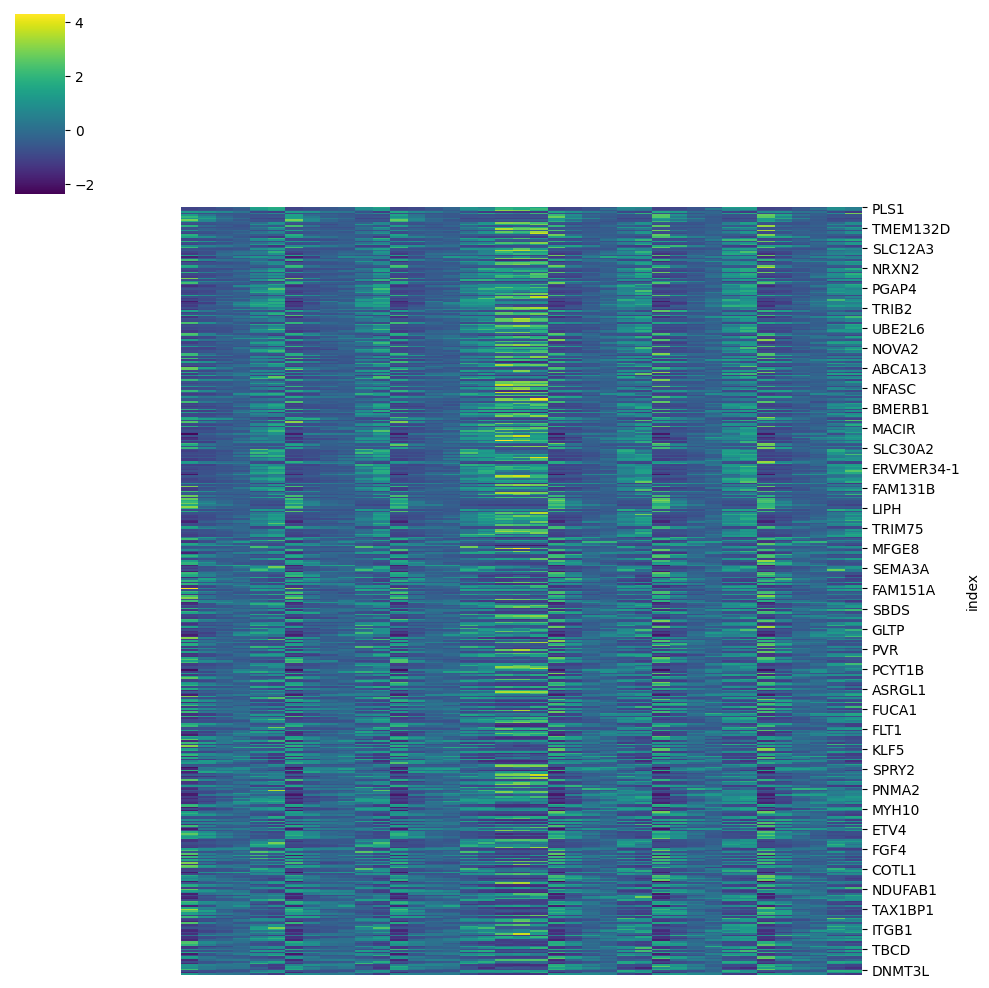

In [51]:
# norm_counts_df.set_index('index',inplace=True)
sns.clustermap(norm_counts_df.loc[sorted_gene_cluster_df.Gene.dropna()], z_score=0,col_cluster=False, row_cluster=False, cmap='viridis', xticklabels=False)
norm_counts_df.loc[sorted_gene_cluster_df.Gene.dropna()]
# sorted_gene_cluster_df.Gene.dropna()

## prerank GSEA

In [7]:
# libraries = ['GO_Biological_Process_2023','GO_Biological_Process_2021','GO_Cellular_Component_2023','GO_Cellular_Component_2021','GO_Molecular_Function_2023','GO_Molecular_Function_2021']
libraries = ['GO_Biological_Process_2023']
for lib in libraries:
    os.makedirs(f'{dirs.gsea}/{lib}', exist_ok=True)

for lib in libraries:
    data = {
        'D100_results': 'DESeq2 Results.xlsx',
        'DCTRL0_results': 'DESeq2 Results.xlsx',
        'DCTRL10_results': 'DESeq2 Results.xlsx',
    }
    for dataset, file in data.items():
        expression_df = pd.read_excel(f'{dirs.deseq2output}/{file}',sheet_name=dataset)
        expression_df = expression_df[expression_df.baseMean>expression_df.baseMean.quantile(0.1)]
        expression_df['Rank'] = -np.log10(expression_df.padj)*expression_df.log2FoldChange
        expression_df.dropna(inplace=True)
        expression_df.drop_duplicates(keep='first', inplace=True)
        expression_df.sort_values('Rank', ascending=False,inplace=True)
        expression_df.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)


        ranking_df = expression_df[['Symbol','Rank']]
        ranking_df.reset_index(drop=True,inplace=True)

        
        unique_present = ranking_df[~ranking_df.duplicated(subset='Symbol',keep='first')]

        pre_res = gp.prerank(rnk = unique_present, # or rnk = rnk,
                            gene_sets=lib,
                            threads=4,
                            min_size=5,
                            max_size=10000,
                            permutation_num=1000, # reduce number to speed up testing
                            outdir=dirs.gsea, # don't write to disk
                            seed=6,
                            verbose=False, # see what's going on behind the scenes
                            )
        output = []
        for term in list(pre_res.results):
            output.append([term,
                        pre_res.results[term]['fdr'],
                        pre_res.results[term]['es'],
                        pre_res.results[term]['nes'],
                        pre_res.results[term]['tag %'],
                        pre_res.results[term]['lead_genes'],
                        pre_res.results[term]['matched_genes']])
        output_df = pd.DataFrame(output,columns=['Term','fdr','es','nes','tag %','lead_genes','matched_genes']).sort_values('fdr').reset_index(drop=True)
        with pd.ExcelWriter(f'{dirs.sigdegs}/Upregulated DEGs.xlsx') as writer:  
            output_df.to_excel(f'{dirs.gsea}/{lib}/GSEA {dataset}.xlsx')

2024-03-11 17:00:18,723 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-11 17:01:41,111 [WARNING] Duplicated values found in preranked stats: 0.09% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-11 17:03:10,938 [WARNING] Duplicated values found in preranked stats: 0.33% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


/var/folders/_n/8ws9lxds3kdcgdlbxz8mr0g00000gn/T/ipykernel_70716/3368470070.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)
/var/folders/_n/8ws9lxds3kdcgdlbxz8mr0g00000gn/T/ipykernel_70716/3368470070.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)
/var/folders/_n/8ws9lxds3kdcgdlbxz8mr0g00000gn/T/ipykernel_70716/3368470070.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)


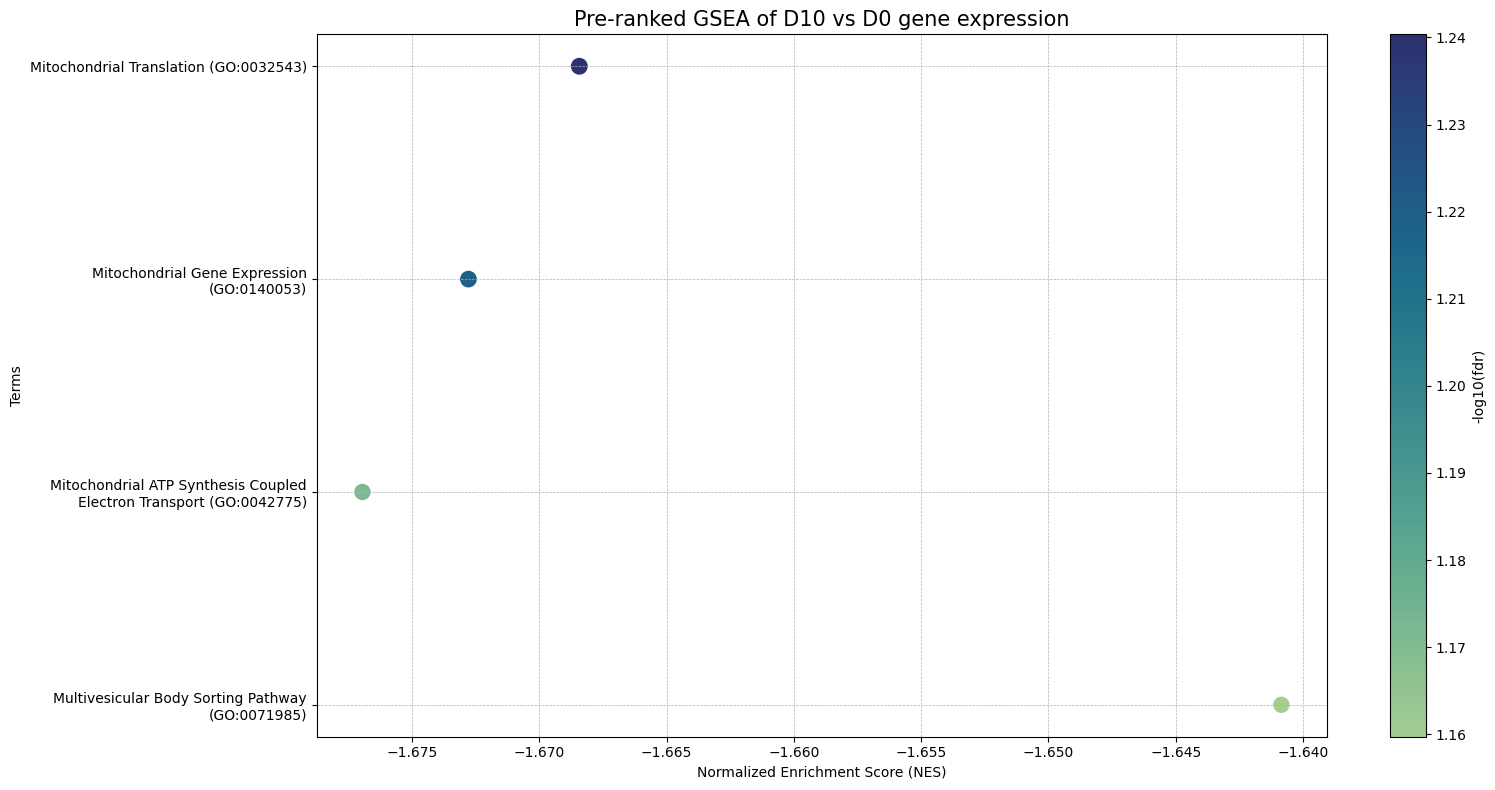

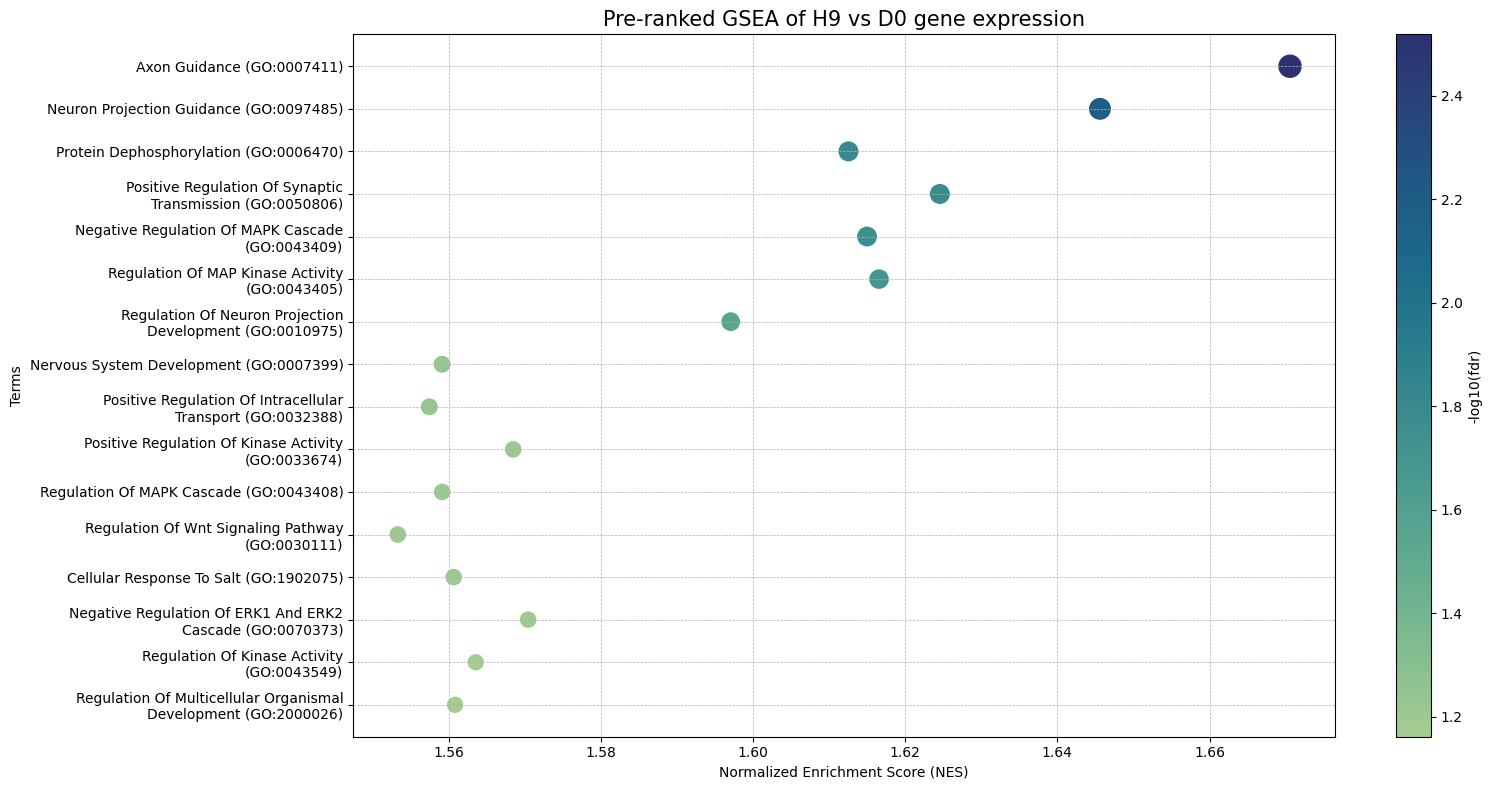

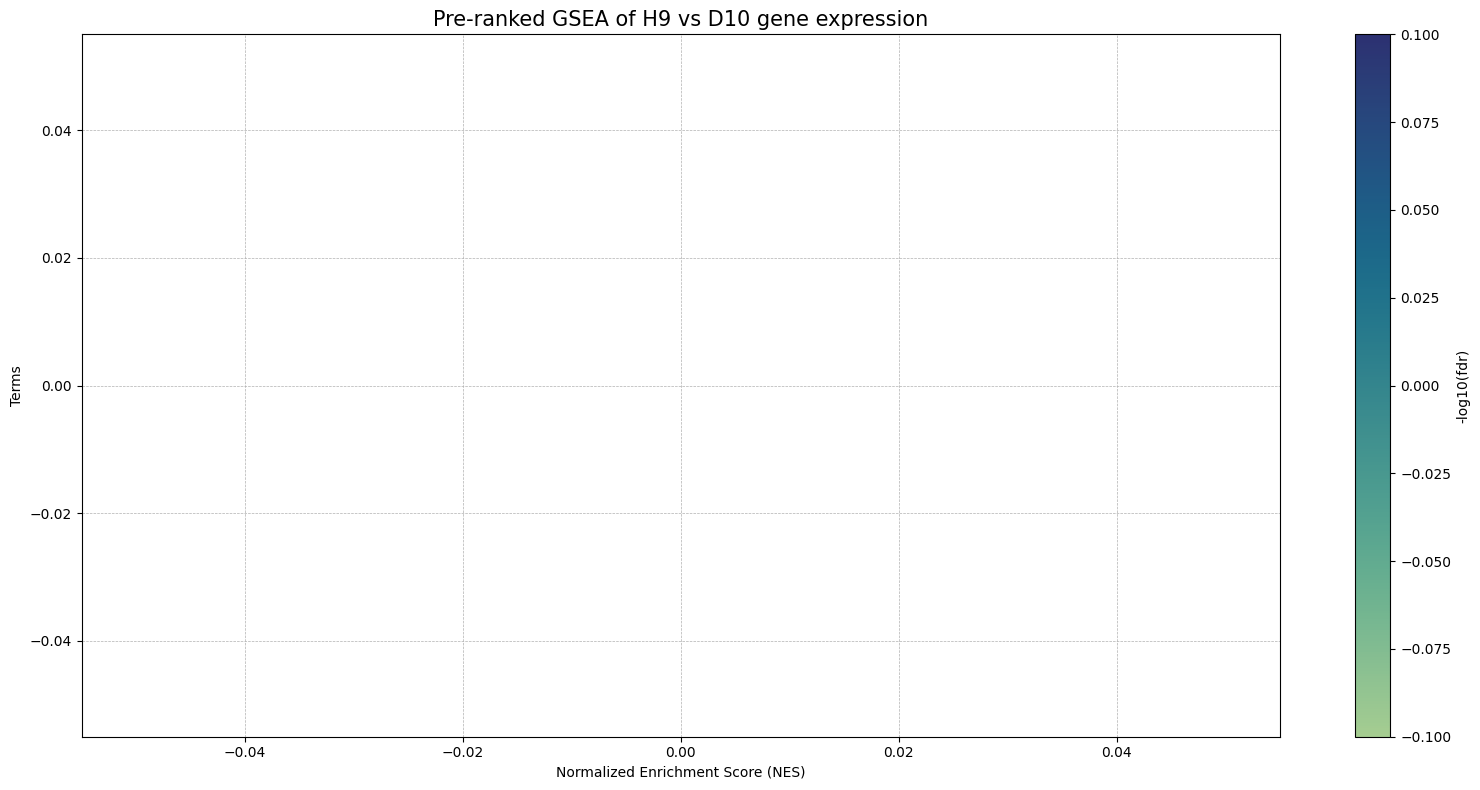

In [21]:
## Plot library 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

plot_titles = {
    'D100_results':'Pre-ranked GSEA of D10 vs D0 gene expression',
    'DCTRL0_results':'Pre-ranked GSEA of H9 vs D0 gene expression',
    'DCTRL10_results':'Pre-ranked GSEA of H9 vs D10 gene expression',

    }
libraries = ['GO_Biological_Process_2023']
data = {
        # 'D100_results': 'DESeq2 Results.xlsx',
        'DCTRL0_results': 'DESeq2 Results.xlsx',
        # 'DCTRL10_results': 'DESeq2 Results.xlsx',
    }
for lib in libraries:
    for dataset in data.keys():
        output_df = pd.read_excel(f'{dirs.gsea}/{lib}/GSEA {dataset}.xlsx')
        output_df.set_index(output_df.columns[0],inplace=True)

        # Select all Significant 
        top_n_df = output_df[output_df.fdr<0.07][::-1]
        top_n_df['-log10(fdr)'] = -np.log10(top_n_df['fdr'].replace(0, np.nan).fillna(np.min(top_n_df['fdr'][top_n_df['fdr'] > 0])))

        # Set the size of the plot
        plt.figure(figsize=(16, 8))
        cmap = plt.get_cmap('crest')
        norm = mcolors.Normalize(vmin=top_n_df['-log10(fdr)'].min(), vmax=top_n_df['-log10(fdr)'].max())

        sc = plt.scatter(x=top_n_df['nes'], y=top_n_df['Term'], s=top_n_df['-log10(fdr)']*100,  # Adjust size scaling as needed
                        c=top_n_df['-log10(fdr)'], cmap=cmap, norm=norm)
        cbar = plt.colorbar(sc)
        cbar.set_label('-log10(fdr)')
        plt.title(plot_titles[dataset],fontsize=15)
        plt.xlabel('Normalized Enrichment Score (NES)')
        plt.ylabel('Terms')
        plt.grid(True, which="both", ls="--", linewidth=0.5)
        wrapped_labels = ['\n'.join(textwrap.wrap(label.get_text(), 40)) for label in plt.gca().get_yticklabels()]
        plt.gca().set_yticklabels(wrapped_labels)
        plt.tight_layout()  # Adjust layout to make room for the longer y-tick labels
        plt.savefig(f'{dirs.gsea}/{lib}/{dataset} Plot.png', dpi = 800,bbox_inches='tight')

## prerank w/ Custom Gene Sets

In [4]:
gene_set = helper.get_msigdb()
list(gene_set.keys())
# gene_set['GOBP_ESTABLISHMENT_OF_EPITHELIAL_CELL_APICAL_BASAL_POLARITY']

['GOBP_POSITIVE_REGULATION_OF_WNT_SIGNALING_PATHWAY_PLANAR_CELL_POLARITY_PATHWAY',
 'KEGG_REGULATION_OF_ACTIN_CYTOSKELETON',
 'GOBP_ESTABLISHMENT_OF_CELL_POLARITY',
 'GOBP_ESTABLISHMENT_OR_MAINTENANCE_OF_CYTOSKELETON_POLARITY',
 'GOBP_MAINTENANCE_OF_APICAL_BASAL_CELL_POLARITY',
 'GOBP_ESTABLISHMENT_OR_MAINTENANCE_OF_MONOPOLAR_CELL_POLARITY',
 'GOBP_REGULATION_OF_ESTABLISHMENT_OF_T_CELL_POLARITY',
 'GOBP_ESTABLISHMENT_OF_EPITHELIAL_CELL_APICAL_BASAL_POLARITY',
 'GOBP_ESTABLISHMENT_OR_MAINTENANCE_OF_CELL_POLARITY',
 'GOBP_ESTABLISHMENT_OF_EPITHELIAL_CELL_POLARITY',
 'GOBP_MAINTENANCE_OF_CELL_POLARITY',
 'GOBP_REGULATION_OF_ESTABLISHMENT_OR_MAINTENANCE_OF_CELL_POLARITY',
 'GOBP_REGULATION_OF_ESTABLISHMENT_OF_PLANAR_POLARITY']

In [5]:
## Run Custom
file = 'DESeq2 Results.xlsx'; dataset = 'DCTRL0_results'
expression_df = pd.read_excel(f'{dirs.deseq2output}/{file}',sheet_name=dataset)
expression_df = expression_df[expression_df['baseMean']>100]
expression_df['Rank'] = -np.log10(expression_df.padj)*expression_df.log2FoldChange
expression_df.sort_values('Rank', ascending=False,inplace=True)
expression_df.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)


ranking_df = expression_df[['Symbol','Rank']]
ranking_df.reset_index(drop=True,inplace=True)
unique_present = ranking_df[~ranking_df.duplicated(subset='Symbol',keep='first')]

pre_res = gp.prerank(rnk = unique_present, # or rnk = rnk,
                    gene_sets=gene_set,
                    threads=4,
                    min_size=5,
                    max_size=10000,
                    permutation_num=1000, # reduce number to speed up testing
                    outdir='.', # don't write to disk
                    seed=6,
                    verbose=True, # see what's going on behind the scenes
                    )
output = []
for term in list(pre_res.results):
    output.append([term,
                pre_res.results[term]['fdr'],
                pre_res.results[term]['es'],
                pre_res.results[term]['nes'],
                pre_res.results[term]['tag %'],
                pre_res.results[term]['lead_genes'],
                pre_res.results[term]['matched_genes']])
output_df = pd.DataFrame(output,columns=['Term','fdr','es','nes','tag %','lead_genes','matched_genes']).sort_values('fdr').reset_index(drop=True)
with pd.ExcelWriter(f'{dirs.sigdegs}/Upregulated DEGs.xlsx') as writer:  
    output_df.to_excel(f'{dirs.gsea}/GSEA {dataset} Custom geneset.xlsx')

2024-03-11 17:36:04,961 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-03-11 17:36:04,965 [WARNING] Duplicated values found in preranked stats: 0.08% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-11 17:36:04,965 [INFO] Parsing data files for GSEA.............................
2024-03-11 17:36:04,966 [INFO] 0001 gene_sets have been filtered out when max_size=10000 and min_size=5
2024-03-11 17:36:04,966 [INFO] 0012 gene_sets used for further statistical testing.....
2024-03-11 17:36:04,966 [INFO] Start to run GSEA...Might take a while..................
2024-03-11 17:36:06,869 [INFO] Start to generate gseapy reports, and produce figures...
2024-03-11 17:36:06,869 [INFO] Congratulations. GSEApy runs successfully................



In [7]:
output_df

,Term,fdr,es,nes,tag %,lead_genes,matched_genes
Unnamed: 0,,,,,,,
0,GOBP_ESTABLISHMENT_OF_CELL_POLARITY,0.012318,0.765383,1.524361,28/116,PLEKHG3;BRSK1;FRMD4A;IGF1R;AMOTL1;SPRY2;SPRY1;...,PLEKHG3;BRSK1;FRMD4A;IGF1R;AMOTL1;SPRY2;SPRY1;...
1,GOBP_REGULATION_OF_ESTABLISHMENT_OF_PLANAR_POL...,0.029425,0.858656,1.467394,5/34,SFRP2;FZD7;MAGI2;SFRP1;VANGL2,SFRP2;FZD7;MAGI2;SFRP1;VANGL2;MED12;DACT1;PTK7...
2,GOBP_ESTABLISHMENT_OR_MAINTENANCE_OF_CELL_POLA...,0.039234,0.687402,1.433877,34/165,PLEKHG3;BRSK1;MAP7;DLG2;FRMD4A;IGF1R;AMOTL1;SP...,PLEKHG3;BRSK1;MAP7;DLG2;FRMD4A;IGF1R;AMOTL1;SP...
3,GOBP_REGULATION_OF_ESTABLISHMENT_OR_MAINTENANC...,0.165944,0.846313,1.331378,3/19,PLEKHG3;TEK;WDPCP,PLEKHG3;TEK;WDPCP;KANK1;RICTOR;FLOT2;ROCK1;LLG...
4,GOBP_ESTABLISHMENT_OF_EPITHELIAL_CELL_POLARITY,0.291241,0.739094,1.249987,10/27,FRMD4A;HES1;MSN;SIPA1;AMOT;LAMA1;RAP2A;FAT1;PT...,FRMD4A;HES1;MSN;SIPA1;AMOT;LAMA1;RAP2A;FAT1;PT...
5,GOBP_ESTABLISHMENT_OR_MAINTENANCE_OF_MONOPOLAR...,0.465100,0.723324,1.137569,8/21,FOXJ1;MSN;LAMA1;PRKCI;RAP2A;FAT1;MAP1B;PTK7,FOXJ1;MSN;LAMA1;PRKCI;RAP2A;FAT1;MAP1B;PTK7;SH...
6,GOBP_ESTABLISHMENT_OF_EPITHELIAL_CELL_APICAL_B...,0.477842,0.720595,1.090920,5/13,MSN;LAMA1;RAP2A;FAT1;PTK7,MSN;LAMA1;RAP2A;FAT1;PTK7;SH3BP1;IFT20;TTC8;CA...
7,KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,0.565408,0.491832,1.004884,29/137,FGFR1;PDGFB;ITGA5;WASF1;VAV3;ITGA7;ARHGEF6;FGF...,FGFR1;PDGFB;ITGA5;WASF1;VAV3;ITGA7;ARHGEF6;FGF...
8,GOBP_POSITIVE_REGULATION_OF_WNT_SIGNALING_PATH...,0.663169,0.644512,0.890047,2/5,NKD1;GPC3,NKD1;GPC3;ABL1;PLEKHA4;DAB2


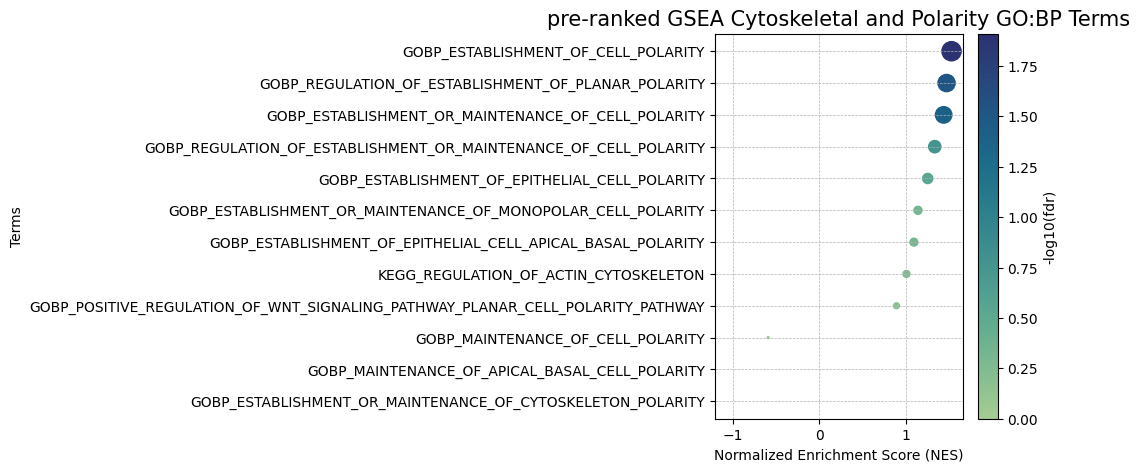

In [11]:
## Plot Custom

file = 'DESeq2 Results.xlsx'; dataset = 'DCTRL0_results Custom geneset'
output_df = pd.read_excel(f'{dirs.gsea}/GSEA {dataset}.xlsx')
output_df.set_index(output_df.columns[0],inplace=True)

# Define the number of top terms you want to plot
n = len(output_df.index.to_list())

# Select the top n terms with the lowest FDR
top_n_df = output_df.head(n)
top_n_df = output_df.head(n)[::-1]

# Convert FDR to -log10 scale for better visualization (handle 0s carefully to avoid -inf)
top_n_df['-log10(fdr)'] = -np.log10(top_n_df['fdr'].replace(0, np.nan).fillna(np.min(top_n_df['fdr'][top_n_df['fdr'] > 0])))

# Set the size of the plot
plt.figure(figsize=(4, 5))

# Define a colormap, e.g., 'coolwarm' for NES
cmap = plt.get_cmap('crest')

# Normalize NES values to the [0, 1] range for color mapping
norm = mcolors.Normalize(vmin=top_n_df['-log10(fdr)'].min(), vmax=top_n_df['-log10(fdr)'].max())

# Scatter plot, coloring dots by NES using the normalized colormap
sc = plt.scatter(x=top_n_df['nes'], y=top_n_df['Term'], s=top_n_df['-log10(fdr)']*100,  # Adjust size scaling as needed
                c=top_n_df['-log10(fdr)'], cmap=cmap, norm=norm)

# Add colorbar to indicate NES values
cbar = plt.colorbar(sc)
cbar.set_label('-log10(fdr)')

# Add titles and l  abels as necessary
plt.title(f'pre-ranked GSEA Cytoskeletal and Polarity GO:BP Terms',fontsize=15)
plt.xlabel('Normalized Enrichment Score (NES)')
plt.ylabel('Terms')

# Optional: Add grid lines for better readability
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Adjust layout

# Show plot
plt.savefig(f'{dirs.gsea}/GSEA {dataset} Custom Gene Set Plot.png', dpi = 800,bbox_inches='tight')

## Classical GSEA

In [ ]:
library = 'GO_Biological_Process_2021'
norm_counts_df = pd.read_excel(f'{deseq2output}/norm_counts.xlsx')
norm_counts_df.set_index('Symbol',inplace=True)

#must only be two classes
gea_result = gp.gsea(data = norm_counts_df.dropna(),
                        gene_sets=library,
                        cls = ['D3','D3','D3','D5','D5','D5','D7','D7','D7'],
                        threads=4,
                        min_size=5, #of pathways reported
                        max_size=10000, #of pathways reported
                        permutation_num=1000,
                        outdir=gsea,
                        seed=6,
                        verbose=True, # see what's going on behind the scenes
                        )
output = []
for term in list(gea_result.results):
    output.append([term,
                gea_result.results[term]['fdr'],
                gea_result.results[term]['es'],
                gea_result.results[term]['nes'],
                gea_result.results[term]['tag %'],
                gea_result.results[term]['lead_genes'],
                gea_result.results[term]['matched_genes']])
output_df = pd.DataFrame(output,columns=['Term','fdr','es','nes','tag %','lead_genes','matched_genes']).sort_values('fdr').reset_index(drop=True)
output_df.to_excel(f'{gsea}/gsea_classical.xlsx')

## Single Sample GSEA

In [ ]:
library = 'GO_Biological_Process_2021'
norm_counts_df = pd.read_excel(f'{deseq2output}/norm_counts.xlsx')
norm_counts_df.set_index('Symbol',inplace=True)
norm_counts_df = norm_counts_df[norm_counts_df.index.map(type) == str]

#must only be two classes
gea_result = gp.ssgsea(data = norm_counts_df,
                        gene_sets=library,
                        threads=4,
                        min_size=5, #of pathways reported
                        max_size=10000, #of pathways reported
                        permutation_num=2,
                        outdir=gsea,
                        seed=6,
                        verbose=True, # see what's going on behind the scenes
                        )
output = []
for term in list(gea_result.results):
    output.append([term,
                gea_result.results[term]['fdr'],   
                gea_result.results[term]['es'],
                gea_result.results[term]['nes'],
                gea_result.results[term]['tag %'],
                gea_result.results[term]['lead_genes'],
                gea_result.results[term]['matched_genes']])
output_df = pd.DataFrame(output,columns=['Term','fdr','es','nes','tag %','lead_genes','matched_genes']).sort_values('fdr').reset_index(drop=True)
output_df.to_excel(f'{gsea}/gsea_singlesample.xlsx')

In [ ]:
gea_result

In [ ]:
norm_counts_df.reset_index().rename({'Symbol':'gene_name'})

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Sample DataFrame
data = {
    'Term': ['Pathway1', 'Pathway2', 'Pathway3', 'Pathway4', 'Pathway5'],
    'fdr': [0.01, 0.2, 0.05, 0.001, 0.1],
    'nes': [1.5, -2.0, 2.5, -1.8, 1.2]
}
output_df = pd.DataFrame(data)

# Convert FDR to -log10(FDR) for color intensity; avoid log of zero by replacing 0 with the smallest non-zero value
output_df['-log10(fdr)'] = -np.log10(output_df['fdr'].replace(0, np.nan).fillna(np.min(output_df['fdr'][output_df['fdr'] > 0])))

# Normalize the -log10(FDR) values to a 0-1 range for the color intensity
fdr_norm = (output_df['-log10(fdr)'] - output_df['-log10(fdr)'].min()) / (output_df['-log10(fdr)'].max() - output_df['-log10(fdr)'].min())

# Choose a colormap
cmap = plt.get_cmap('Reds')

# Plot
plt.figure(figsize=(10, 6))
for i, row in output_df.iterrows():
    plt.scatter(row['nes'], row['Term'], color=cmap(fdr_norm[i]), s=100)  # s is the size of the dot

# Adding a colorbar to represent FDR significance levels
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(fdr_norm), vmax=max(fdr_norm)))
sm.set_array([])
plt.colorbar(sm, label='-log10(FDR) Normalized')

plt.title('GSEA Results: NES vs. Gene Sets (Color Intensity represents FDR significance)')
plt.xlabel('Normalized Enrichment Score (NES)')
plt.ylabel('Gene Sets')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## DAVID

In [71]:
with open(f'DAVID/D100 BP up.txt', 'r', encoding='utf-8',errors='replace') as file:
    content = [line.strip() for line in file]
columns = content[0].split('\t')
df_dict = {}
for row in range(len(content)):
    print
    temp = content[row].split('\t')
    df_dict[temp[1]] = temp[2:]
df = pd.DataFrame.from_dict(df_dict).T
df.rename(columns=df.iloc[0],inplace=True)
df = df.iloc[1:]
sigup_BP = df.iloc[:10]
sigup_BP.loc[:,sigup_BP.columns[4:]] = sigup_BP[sigup_BP.columns[4:]].astype(float)
sigup_BP

/var/folders/_n/8ws9lxds3kdcgdlbxz8mr0g00000gn/T/ipykernel_50909/2068567803.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigup_BP.loc[:,sigup_BP.columns[4:]] = sigup_BP[sigup_BP.columns[4:]].astype(float)


,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
GO:0007399~nervous system development,231,2.942300343905235,9.657779885891667E-19,"6597, 91653, 9863, 6599, 5026, 22871, 351, 229...",6547.0,425.0,19453.0,1.614981,0.0,0.0,0.0
GO:0007411~axon guidance,122,1.5539421729715959,3.714378521686111E-16,"91653, 7204, 10371, 374946, 56896, 3913, 5818,...",6547.0,195.0,19453.0,1.858958,0.0,0.0,0.0
GO:0007155~cell adhesion,280,3.566424659279073,4.86846079431565E-15,"1462, 56098, 22871, 351, 22997, 4606, 57502, 5...",6547.0,566.0,19453.0,1.469893,0.0,0.0,0.0
GO:0006468~protein phosphorylation,226,2.8786141892752517,5.884846630671438E-14,"4293, 23604, 129685, 65125, 7443, 11183, 351, ...",6547.0,444.0,19453.0,1.512411,0.0,0.0,0.0
GO:0035556~intracellular signal transduction,231,2.942300343905235,3.441075032546145E-13,"8651, 23604, 65125, 11183, 197370, 8091, 111, ...",6547.0,462.0,19453.0,1.485642,0.0,0.0,0.0
"GO:0006355~regulation of transcription, DNA-templated",439,5.591644376512546,5.267924394660258E-11,"90321, 8091, 168374, 81606, 4848, 51085, 57623...",6547.0,1014.0,19453.0,1.286385,0.000001,0.0,0.0
GO:0030036~actin cytoskeleton organization,124,1.5794166348235894,8.402315001031563E-10,"88, 89, 10092, 55160, 26037, 2275, 57221, 9101...",6547.0,232.0,19453.0,1.5881,0.000008,0.000001,0.000001
GO:0060271~cilium assembly,125,1.592153865749586,1.061794402265069E-9,"9742, 10097, 10096, 22873, 22994, 27241, 2302,...",6547.0,235.0,19453.0,1.580471,0.00001,0.000001,0.000001
GO:0016477~cell migration,141,1.7959495605655331,5.459349850368539E-9,"54908, 10092, 5420, 399687, 7040, 91010, 3913,...",6547.0,278.0,19453.0,1.507018,0.000052,0.000006,0.000006
GO:0098609~cell-cell adhesion,105,1.3374092472296522,1.086121550415629E-8,"91653, 596, 5818, 54751, 3875, 1739, 90952, 92...",6547.0,195.0,19453.0,1.599922,0.000103,0.00001,0.00001


In [67]:
sigup_BP

,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
GO:0007399~nervous system development,231,2.942300343905235,9.657779885891667E-19,"6597, 91653, 9863, 6599, 5026, 22871, 351, 229...",6547,425,19453,1.614980547893512,9.200001119300403E-15,9.200001119300403E-15,9.091833984578416E-15
GO:0007411~axon guidance,122,1.5539421729715959,3.714378521686111E-16,"91653, 7204, 10371, 374946, 56896, 3913, 5818,...",6547,195,19453,1.8589575182213032,3.1727953597737724E-12,1.7691584898790947E-12,1.7483579701576525E-12
GO:0007155~cell adhesion,280,3.566424659279073,4.86846079431565E-15,"1462, 56098, 22871, 351, 22997, 4606, 57502, 5...",6547,566,19453,1.4698934208260899,4.653433194334866E-11,1.545898584221696E-11,1.5277229972562508E-11
GO:0006468~protein phosphorylation,226,2.8786141892752517,5.884846630671438E-14,"4293, 23604, 129685, 65125, 7443, 11183, 351, ...",6547,444,19453,1.5124106082560336,5.605271802266998E-10,1.4014762250944029E-10,1.3849986545285228E-10
GO:0035556~intracellular signal transduction,231,2.942300343905235,3.441075032546145E-13,"8651, 23604, 65125, 11183, 197370, 8091, 111, ...",6547,462,19453,1.4856422789063692,3.277497606646307E-9,6.555936152006916E-10,6.478856071277882E-10
"GO:0006355~regulation of transcription, DNA-templated",439,5.591644376512546,5.267924394660258E-11,"90321, 8091, 168374, 81606, 4848, 51085, 57623...",6547,1014,19453,1.286384537356797,5.018218793839679E-7,8.36370796392227E-8,8.265373375221945E-8
GO:0030036~actin cytoskeleton organization,124,1.5794166348235894,8.402315001031563E-10,"88, 89, 10092, 55160, 26037, 2275, 57221, 9101...",6547,232,19453,1.5881003671068086,8.004013725915193E-6,1.1434350385689524E-6,1.129991334567302E-6
GO:0060271~cilium assembly,125,1.592153865749586,1.061794402265069E-9,"9742, 10097, 10096, 22873, 22994, 27241, 2302,...",6547,235,19453,1.5804705094748612,1.011460259414676E-5,1.264331684497131E-6,1.2494665628654198E-6
GO:0016477~cell migration,141,1.7959495605655331,5.459349850368539E-9,"54908, 10092, 5420, 399687, 7040, 91010, 3913,...",6547,278,19453,1.5070184268043025,5.200441464203731E-5,5.778418519401188E-6,5.710479943485492E-6
GO:0098609~cell-cell adhesion,105,1.3374092472296522,1.086121550415629E-8,"91653, 596, 5818, 54751, 3875, 1739, 90952, 92...",6547,195,19453,1.5999224542068593,1.0345858703986188E-4,1.0346393889259282E-5,1.022474827561273E-5


In [72]:
# top_n_df = df[sigup_BP.fdr<0.10][::-1]
top_n_df['-log10(fdr)'] = -np.log10(sigup_BP['FDR'].replace(0, np.nan).fillna(np.min(top_n_df['fdr'][top_n_df['fdr'] > 0])))

# Set the size of the plot
plt.figure(figsize=(16, 8))
cmap = plt.get_cmap('crest')
norm = mcolors.Normalize(vmin=top_n_df['-log10(fdr)'].min(), vmax=top_n_df['-log10(fdr)'].max())

sc = plt.scatter(x=top_n_df['nes'], y=top_n_df['Term'], s=top_n_df['-log10(fdr)']*100,  # Adjust size scaling as needed
                c=top_n_df['-log10(fdr)'], cmap=cmap, norm=norm)
cbar = plt.colorbar(sc)
cbar.set_label('-log10(fdr)')
plt.title(plot_titles[dataset],fontsize=15)
plt.xlabel('Normalized Enrichment Score (NES)')
plt.ylabel('Terms')
plt.grid(True, which="both", ls="--", linewidth=0.5)
wrapped_labels = ['\n'.join(textwrap.wrap(label.get_text(), 40)) for label in plt.gca().get_yticklabels()]
plt.gca().set_yticklabels(wrapped_labels)
plt.tight_layout()  # Adjust layout to make room for the longer y-tick labels
plt.savefig(f'{gsea}/{lib}/{dataset} Plot.png', dpi = 800,bbox_inches='tight')

/var/folders/_n/8ws9lxds3kdcgdlbxz8mr0g00000gn/T/ipykernel_50909/2601453418.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  top_n_df['-log10(fdr)'] = -np.log10(sigup_BP['FDR'].replace(0, np.nan).fillna(np.min(top_n_df['fdr'][top_n_df['fdr'] > 0])))
/var/folders/_n/8ws9lxds3kdcgdlbxz8mr0g00000gn/T/ipykernel_50909/2601453418.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(wrapped_labels)


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

Error in callback <function _draw_all_if_interactive at 0x1099f53a0> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1600x800 with 2 Axes>